# Ch3. Neural Network

## 1. actiavtion function

활성화 함수는 입력 신호의 총합이 활성화를 일으키는지 정하는 역할을 하며 신경망을 비선형으로 만들어 주는 역할을 한다.
<br>
### 1.1. step function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step_function(x):
	return np.array(x > 0, dtype=np.int32)

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

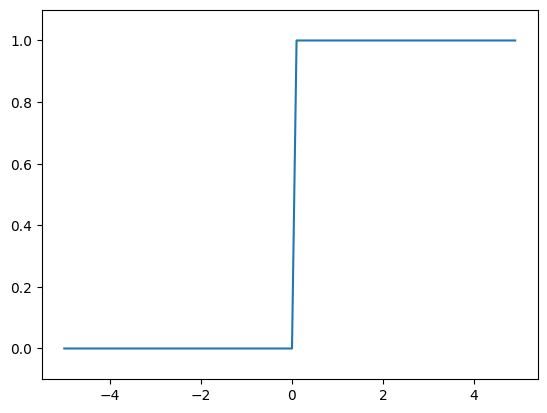

In [4]:
plt.plot(x, step_function(x))
plt.ylim(-0.1, 1.1)
plt.show()

### 1.2. sigmoid function

In [5]:
def sigmoid(x):
	return 1 / (1 + np.exp(-x))

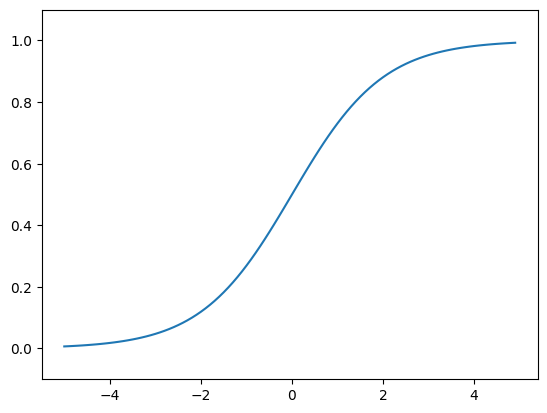

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, sigmoid(x))
plt.ylim(-0.1, 1.1)
plt.show()

두 활성화 함수의 공통점은 '비선형 함수'라는 것이다. 선형함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문에 신경망에 비선형 함수인 활성화 함수를 추가하는 것은 매우 중요하다.

### 1.3. ReLU function

In [7]:
def relu(x):
	return np.maximum(0, x)

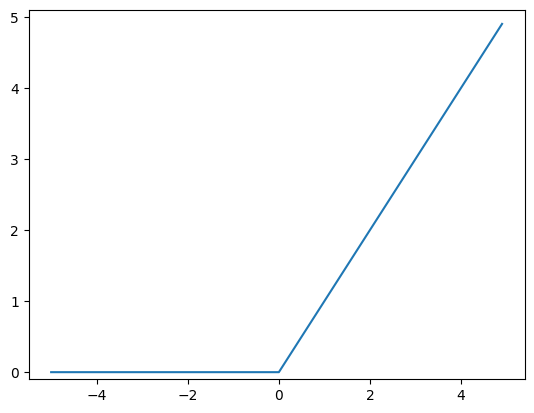

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, relu(x))
plt.ylim(-0.1, 5.1)
plt.show()

### 1.4. softmax function
출력층의 활성화 함수를 설계하기 위해 사용되는 것 중 하나는 softmax function이다.

In [9]:
def softmax(a):
	c = np.max(a) # overflow 방지
	exp_a = np.exp(a - c)
	sum_exp_a = np.sum(exp_a)
	y = exp_a / sum_exp_a
	return y

## 2. 신경망의 추론
### 2.1. mnist 손글씨 숫자 인식

In [10]:
import sys, os
sys.path.append(os.curdir)
from dataset.mnist import load_mnist

In [11]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [12]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [13]:
def get_data():
	(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
	return x_test, t_test

In [14]:
import pickle

def init_network():
	with open("sample_weight.pkl", 'rb') as f:
		network = pickle.load(f)
	return network

In [15]:
def predict(network, x):
	W1, W2, W3 = network['W1'], network['W2'], network['W3']
	b1, b2, b3 = network['b1'], network['b2'], network['b3']
	
	a1 = np.dot(x, W1) + b1
	z1 = sigmoid(a1)
	
	a2 = np.dot(z1, W2) + b2
	z2 = sigmoid(a2)
	
	a3 = np.dot(z2, W3) + b3
	y = softmax(a3)
	
	return y

In [16]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
	y = predict(network, x[i])
	p = np.argmax(y)
	if p == t[i]:
		accuracy_cnt += 1
		
print(f"Accuracy: {float(accuracy_cnt) / len(x)}")

/var/folders/n5/n0b0brnd4cbb63xdqf_rmhvh0000gn/T/ipykernel_36489/3322766174.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 0.9207


### 2.2. 배치 처리

In [24]:
x, _ = get_data()
network = init_network()

In [41]:
batch_size = 50
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
	y = predict(network, x[i:i+batch_size])
	p = np.argmax(y, axis=1)
	accuracy_cnt += (p == t[i:i+batch_size]).sum()
	
print(f"Accuracy: {float(accuracy_cnt) / len(x)}")

/var/folders/n5/n0b0brnd4cbb63xdqf_rmhvh0000gn/T/ipykernel_36489/3322766174.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 0.9207
